# Trade network analysis
**Brian Dew (brianwdew@gmail.com)**

`11_plots.ipynb`

Generates LaTeX tables with summary statistics on:

Required file:

* `imf_data_oil.csv` - created by `03oil_IFS.ipynb`

---

METODO: 

Annotate and expand

#### Libraries

In [1]:
import pandas as pd                                         # pandas dataframes used for convenience
import os                                                   # change current directory in next line
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('C:/Working/trade_network/data/')

#### Plot of trade and oil price

In [2]:
wti = pd.read_csv('imf_data_oil.csv', index_col='level_0').loc['DE'].reset_index().set_index('date')['@OBS_VALUE']
tx = pd.read_csv('imf_data_oil.csv').groupby(['date']).sum()["('x', u'@OBS_VALUE')"]
txwti = pd.concat([wti, tx], axis=1)
txwti.index = pd.to_datetime(txwti.index)
txwti = txwti.rename(columns={'@OBS_VALUE': 'wti', "('x', u'@OBS_VALUE')": 'tx'})
txwti['wti_ix'] = txwti['wti'] / txwti['wti'][0]
txwti['tx_ix'] = txwti['tx'] / txwti['tx'][0]
txwti[['wti_ix','tx_ix']].to_csv('tx_wti_ix.csv')

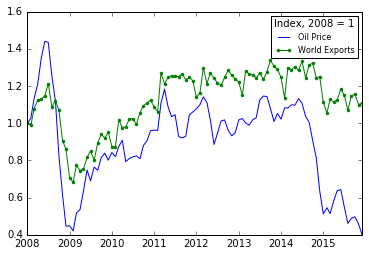

In [34]:
plt.plot(txwti['wti_ix'], label='Oil Price', linewidth=1)
plt.plot(txwti['tx_ix'], label='World Exports', linewidth=1, color='g', marker='.')
plt.legend(title='Index, 2008 = 1', loc=1, prop={'size':8})
plt.savefig('wti_ix.pdf', bbox_inches='tight')

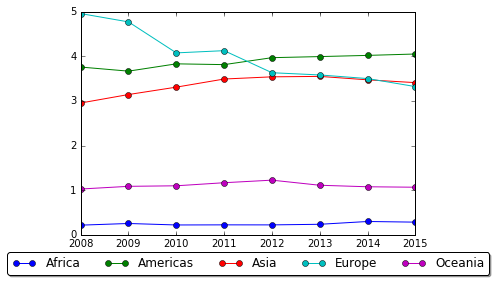

In [47]:
cont_cent = pd.read_csv('region_centrality_scores.csv', index_col='Date')
cont_cent.index = pd.to_datetime(cont_cent.index)
cont_cent.plot(linewidth=1, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('cent_continent.pdf', bbox_inches='tight')